# Proyek Analisis Data: [E-COMMERCE]
- **Nama:** [Luri Zahara]
- **Email:** [m011d4kx2523@bangkit.academy]
- **ID Dicoding:** [M011D4KX2523]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa waktu pengiriman pesanan yang terkirim oleh E-Commerce Olist dari proses pembelian hingga pesanan sampai?
- Kategori produk apa yang paling banyak dibeli pelanggan?
- Tipe pembayaran apa yang paling banyak digunakan pelanggan?
- Bagaimana tingkat kepuasan pelanggan berdasarkan review yang diberikan?
- Dimana lokasi dengan pelanggan terbanyak?
- Dimana lokasi dengan penjual terbanyak?


## Import Semua Packages/Library yang Digunakan

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

Order

In [73]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/orders_dataset.csv")
orders_df .head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Customers

In [74]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/customers_dataset.csv")
customers_df .head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Order Item

In [75]:
orders_item_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/order_items_dataset.csv")
orders_item_df .head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payment

In [76]:
orders_payments_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/order_payments_dataset.csv")
orders_payments_df .head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Review

In [77]:
orders_review_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/order_reviews_dataset.csv")
orders_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Product

In [78]:
product_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/products_dataset.csv")
product_df .head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Product Category Name in English

In [79]:
product_trans_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/product_category_name_translation.csv")
product_trans_df .head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Seller

In [80]:
seller_df  = pd.read_csv("https://raw.githubusercontent.com/lrzhr/pandcd/main/sellers_dataset.csv")
seller_df .head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Geolocation (File location at: https://drive.google.com/file/d/1D7e74iUFg4Y-a9BOH4nnZTgFCnMQh_ok/view?usp=sharing)

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
geolocation_df  = pd.read_csv('/content/drive/MyDrive/e-commerce/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

####Menilai tabel `orders_df`

In [83]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [84]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [85]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [86]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [87]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

####Menilai tabel `customers_df`

In [88]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [89]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [90]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [91]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

####Menilai tabel `orders_item_df`

In [92]:
orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [93]:
orders_item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [94]:
orders_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [95]:
print("Jumlah duplikasi: ",orders_item_df.duplicated().sum())
orders_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Menilai tabel `orders_payments_df`

In [96]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [97]:
orders_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [98]:
orders_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [99]:
orders_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [100]:
print("Jumlah duplikasi: ",orders_payments_df.duplicated().sum())
orders_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Menilai tabel `product_df`

In [101]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [102]:
product_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [103]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [104]:
product_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [105]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Menilai tabel `seller`

In [106]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [107]:
seller_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [108]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [109]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


####Menilai tabel `geolocation`

In [110]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [111]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [112]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [113]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


####Menilai tabel `orders_review`

In [114]:
orders_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [115]:
orders_review_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [116]:
orders_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [117]:
print("Jumlah duplikasi: ", orders_review_df.duplicated().sum())
orders_review_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Cleaning Data

####Membersihkan tabel `orders_df`

Mengubah tipe data pada kolom

In [118]:
# Mengubah tipe data kolom menjadi date time
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

Memperhatikan missing value

In [119]:
# Memperhatikan missing value
orders_df[orders_df.order_approved_at.isna()]
orders_df
# Missing value terdapat pada beberapa kolom karena 'order_status' tidak delivered sehingga proses pesanan pelanggan tidak tuntas
# Oleh karena itu missing value dapat diabaikan saja

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


####Membersihkan tabel `orders_item_df`

Mengubah tipe data

In [120]:
# Mengubah tipe data kolom menjadi date time
orders_item_df['shipping_limit_date'] = pd.to_datetime(orders_item_df['shipping_limit_date'])

####Membersihkan tabel `orders_review_df`

Mengubah tipe data

In [121]:
# Mengubah tipe data kolom menjadi date time
orders_review_df['review_creation_date'] = pd.to_datetime(orders_review_df['review_creation_date'])

In [122]:
orders_review_df[orders_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [123]:
orders_review_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [124]:
orders_review_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [125]:
orders_review_df['review_comment_title'].fillna(value="No Comment", inplace=True)
orders_review_df['review_comment_message'].fillna(value="No Comment", inplace=True)

In [126]:
orders_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

####Membersihkan tabel `geolocation_df`

Tidak perlu menghapus duplikasi data karena terdapat nilai yang sama pada kolom `geolocation_city`dan `geolocation_state`

####Membersihkan tabel `product`

In [127]:
# Dropping missing value karena tidak ada informasi lebih lanjut jika ingin  melakukan imputation atau interpolation
product_df.dropna(inplace=True)

In [128]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `orders_df`

Perbandingan rata-rata waktu pesanan sampai di tangan pelanggan dengan estimasinya

In [129]:
# Membuat kolom baru untuk mengetahui perbedaan estimasi waktu pesanan sampai dengan waktu sebenarnya
# Mengubah tipe data kolom baru menjadi time delata

# Membuat kolom baru, selisih 'order_estimated_delivery_date' dengan 'order_purchase_timestamp'
orders_df['estimated_time']=(orders_df['order_estimated_delivery_date']-orders_df['order_purchase_timestamp'])
orders_df['estimated_time'] = pd.to_timedelta(orders_df['estimated_time'])

# Membuat kolom baru, selisih 'order_delivered_customer_date' dengan 'order_purchase_timestamp'
orders_df['actual_time']=(orders_df['order_delivered_customer_date']-orders_df['order_purchase_timestamp'])
orders_df['actual_time'] = pd.to_timedelta(orders_df['actual_time'])

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_time,actual_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19 days 03:18:23,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26 days 15:21:11,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26 days 04:31:54,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12 days 02:41:21,2 days 20:58:23


In [130]:
avg_actual_delivery = orders_df['actual_time'].mean()
avg_estimated_delivery = orders_df['estimated_time'].mean()
print("Rata-rata waktu sebenarnya pesanan sampai di tangan pelanggan:", avg_actual_delivery)
print("Rata-rata waktu estimasi pesanan sampai di tangan pelanggan:", avg_estimated_delivery)

Rata-rata waktu sebenarnya pesanan sampai di tangan pelanggan: 12 days 13:24:31.879068369
Rata-rata waktu estimasi pesanan sampai di tangan pelanggan: 23 days 18:25:24.953530234


###Explore `orders_df`, `orders_item`, `orders_review`, dan `orders_payment`

Menggabungkan tabel tersebut dengan syarat order status delivered

In [131]:
# Fokus kepada pesanan yang terkirim
delivered_orders_df = orders_df[orders_df.order_status=='delivered']
all_orders_df = delivered_orders_df.merge(
    orders_item_df, how = 'left', on ='order_id').merge(
    orders_payments_df, how = 'left', on = 'order_id').merge(
    orders_review_df, how = 'left', on ='order_id')
all_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_time,actual_time,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19 days 03:18:23,13 days 18:46:08,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26 days 15:21:11,9 days 09:27:40,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Comment,No Comment,2018-08-18,2018-08-22 19:07:58


###Explore `customers_df`

10 lokasi teratas dengan pelanggan terbanyak

In [132]:
# Asal kota dan state customer
print (" 10 kota dengan pelanggan terbanyak:\n", customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(10))
print (" 10 state dengan pelanggan terbanyak:\n", customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).head(10))

 10 kota dengan pelanggan terbanyak:
 customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64
 10 state dengan pelanggan terbanyak:
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64


###Explore `seller_df`

Asal lokasi teratas dengan seller terbanyak

In [133]:
# Asal kota dan state seller
print (" 10 kota dengan penjual terbanyak:\n", seller_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).head(10))
print (" 10 state dengan penjual terbanyak:\n", seller_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).head(10))

 10 kota dengan penjual terbanyak:
 seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64
 10 state dengan penjual terbanyak:
 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64


###Explore `product_df` dan `product_trans_df`

Menggabungkan tabel

In [134]:
all_products_df = pd.merge (
    left = product_df,
    right = product_trans_df,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
all_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [135]:
all_orders_df = delivered_orders_df.merge(
    orders_item_df, how = 'left', on ='order_id').merge(
    orders_payments_df, how = 'left', on = 'order_id').merge(
    orders_review_df, how = 'left', on ='order_id')
all_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_time,actual_time,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19 days 03:18:23,13 days 18:46:08,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26 days 15:21:11,9 days 09:27:40,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Comment,No Comment,2018-08-18,2018-08-22 19:07:58


###Explore seluruh tabel

Menggabungkan tabel order, product, dan seller.



In [136]:
all_ecommerce_df = pd.merge(all_orders_df, all_products_df,how="left", on="product_id").merge(
    customers_df, how="left", on="customer_id").merge(
    seller_df, how="left", on="seller_id")
all_ecommerce_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_time,actual_time,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15 days 13:03:27,8 days 10:28:40,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19 days 03:18:23,13 days 18:46:08,...,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26 days 15:21:11,9 days 09:27:40,...,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa waktu pengiriman pesanan yang terkirim oleh E-Commerce Olist dari proses pembelian hingga pesanan sampai?

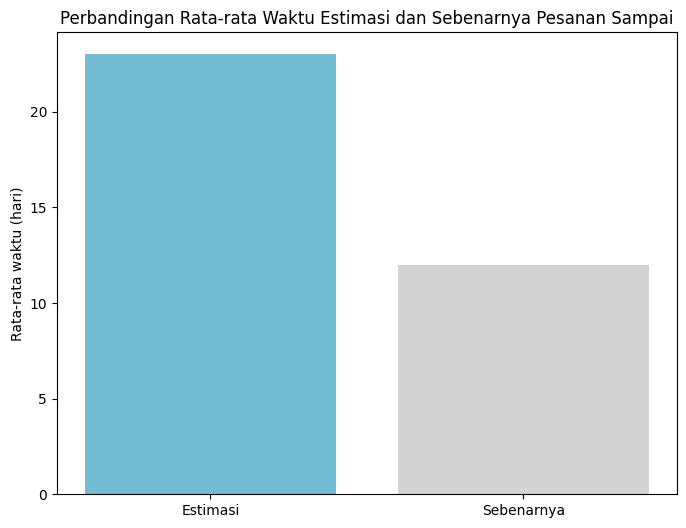

Rata-rata waktu estimasi pesanan sampai di tangan pelanggan: 23 hari
Rata-rata waktu sebenarnya pesanan sampai di tangan pelanggan: 12 hari


In [137]:
avg_actual_delivery = all_ecommerce_df['actual_time'].mean().days
avg_estimated_delivery = all_ecommerce_df['estimated_time'].mean().days

plt.figure(figsize=(8,6))
plt.title("Perbandingan Rata-rata Waktu Estimasi dan Sebenarnya Pesanan Sampai", fontsize=12)
plt.bar(["Estimasi","Sebenarnya"],[avg_estimated_delivery,avg_actual_delivery],color= ["#72BCD4", "#D3D3D3"]),
plt.ylabel("Rata-rata waktu (hari)")
plt.show()

print("Rata-rata waktu estimasi pesanan sampai di tangan pelanggan:", avg_estimated_delivery,"hari")
print("Rata-rata waktu sebenarnya pesanan sampai di tangan pelanggan:", avg_actual_delivery,"hari")

### Pertanyaan 2: Kategori produk apa yang paling banyak dibeli pelanggan?

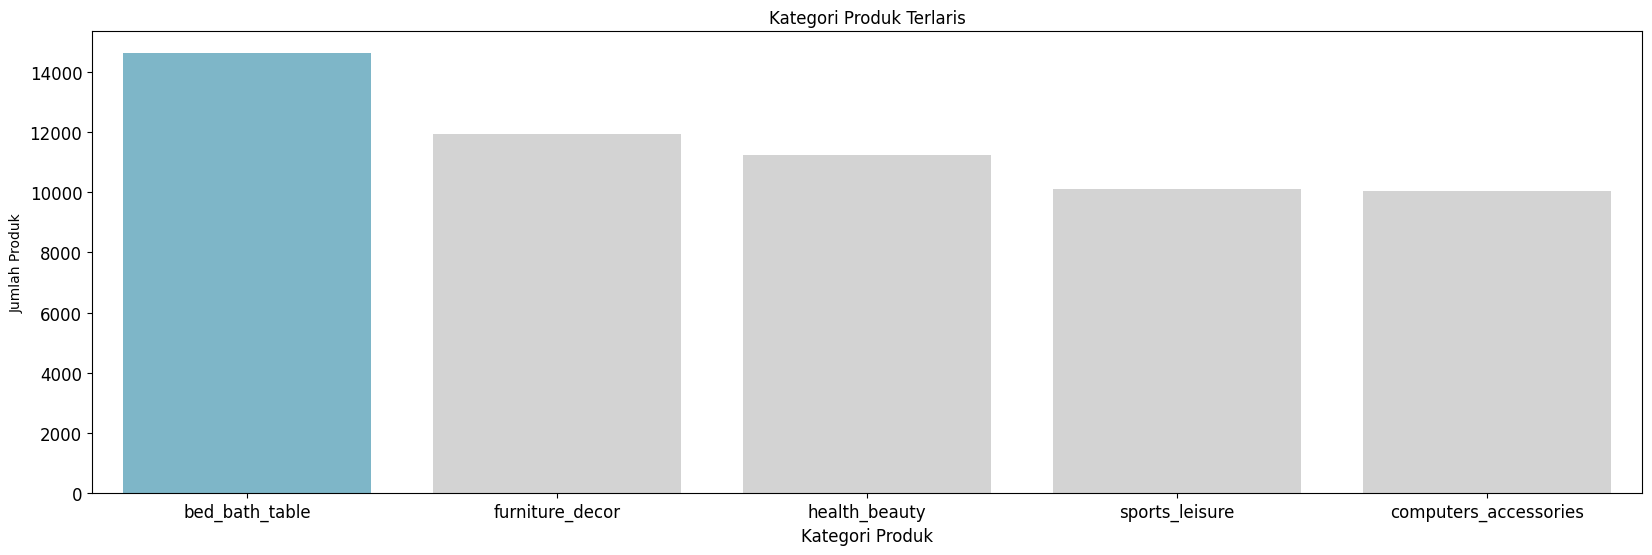

In [138]:
category_products_df = all_ecommerce_df.groupby(by="product_category_name_english").order_item_id.sum() \
    .sort_values(ascending=False).reset_index()
category_products_df.columns = ["product_category", "product_total"]

fig, ax = plt.subplots(figsize=(20,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_category", y="product_total", data=category_products_df.head(5), hue = "product_category", palette=colors, ax=ax, dodge=False, legend=False)
ax.set_ylabel("Jumlah Produk")
ax.set_xlabel("Kategori Produk", fontsize = 12)
ax.set_title("Kategori Produk Terlaris",fontsize = 12 )
ax.tick_params(axis ='y', labelsize=12)
ax.tick_params(axis ='x', labelsize=12)

plt.show()

In [139]:
category_products_df.head()

,product_category,product_total
0,bed_bath_table,14603
1,furniture_decor,11932
2,health_beauty,11247
3,sports_leisure,10111
4,computers_accessories,10044


### Pertanyaan 3: Tipe Pembayaran apa yang paling banyak digunakan pelanggan?

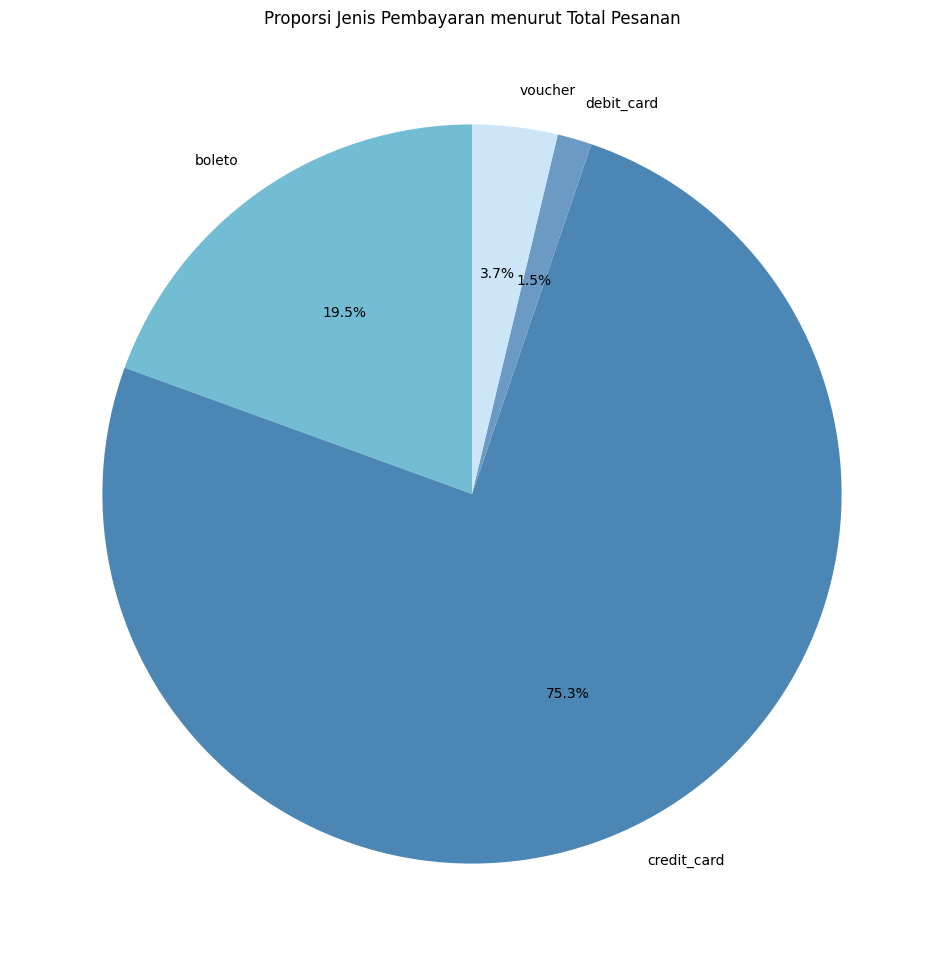

In [140]:
payment_type_df = all_ecommerce_df.groupby(by="payment_type").order_id.nunique().reset_index()
payment_type_df.columns = ["payment_type", "order_total"]

plt.figure(figsize=(12,12))
colors = ["#72BCD4", "#4B86B4", "#6B9AC4", "#CDE6F7", "#ADD2E6"]

plt.pie(payment_type_df["order_total"], labels = payment_type_df["payment_type"],autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporsi Jenis Pembayaran menurut Total Pesanan",fontsize = 12 )
plt.show()

### Pertanyaan 4: Bagaimana tingkat kepuasan pelanggan berdasarkan review yang diberikan?

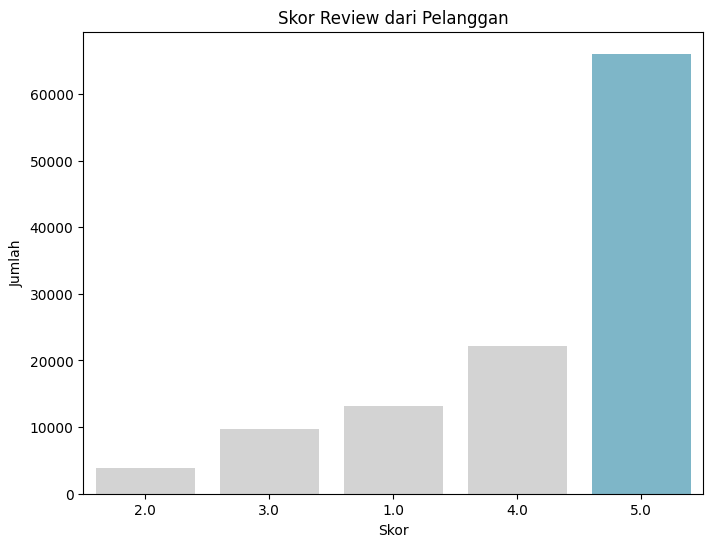

2.0     3899
3.0     9649
1.0    13118
4.0    22150
5.0    66046
Name: review_score, dtype: int64


In [141]:
review_customers_df = all_ecommerce_df['review_score'].value_counts().sort_values(ascending=True)
review_score_index = review_customers_df.sort_index(ascending=True).index[4]

plt.figure(figsize=(8,6))
colors = ["#72BCD4" if review_score == review_score_index else "#D3D3D3" for review_score in review_customers_df.index]

sns.barplot( x = review_customers_df.index, y = review_customers_df.values, order = review_customers_df.index, palette = colors, hue = review_customers_df.index, legend = False)
plt.title("Skor Review dari Pelanggan", fontsize=12)
plt.xlabel("Skor")
plt.ylabel("Jumlah")
plt.show()
print(review_customers_df)


### Pertanyaan 5: Dimana lokasi dengan pelanggan paling banyak?

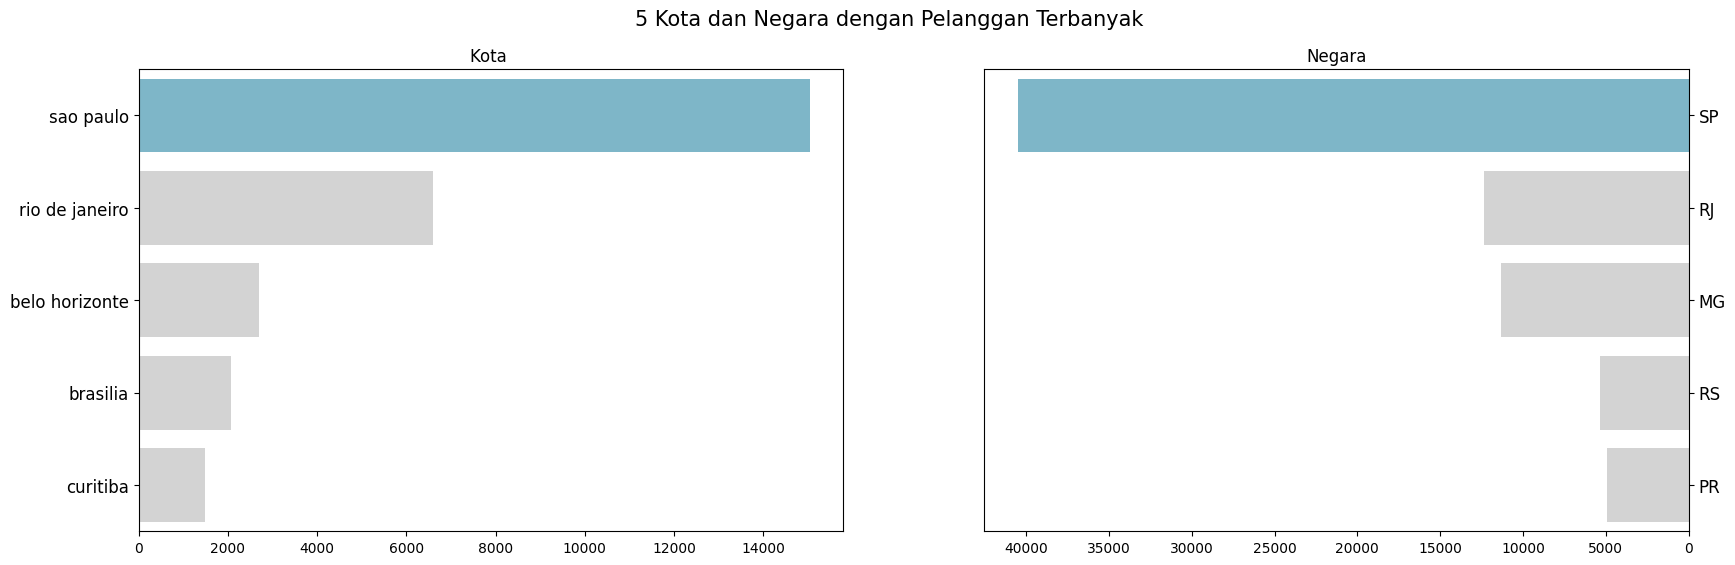

In [142]:
city_customers = all_ecommerce_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(5)
state_customers = all_ecommerce_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=city_customers.values, y=city_customers.index, hue = city_customers.index, dodge=False, legend=False, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kota ",loc="center",fontsize=12)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x=state_customers.values, y=state_customers.index, hue = state_customers.index, dodge=False, legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara", loc="center", fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("5 Kota dan Negara dengan Pelanggan Terbanyak", fontsize=15)
plt.show()

In [143]:
print(city_customers)
print(state_customers)

customer_city
sao paulo         15045
rio de janeiro     6601
belo horizonte     2697
brasilia           2071
curitiba           1489
Name: customer_id, dtype: int64
customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
Name: customer_id, dtype: int64


### Pertanyaan 6: Dimana lokasi dengan penjual paling banyak?

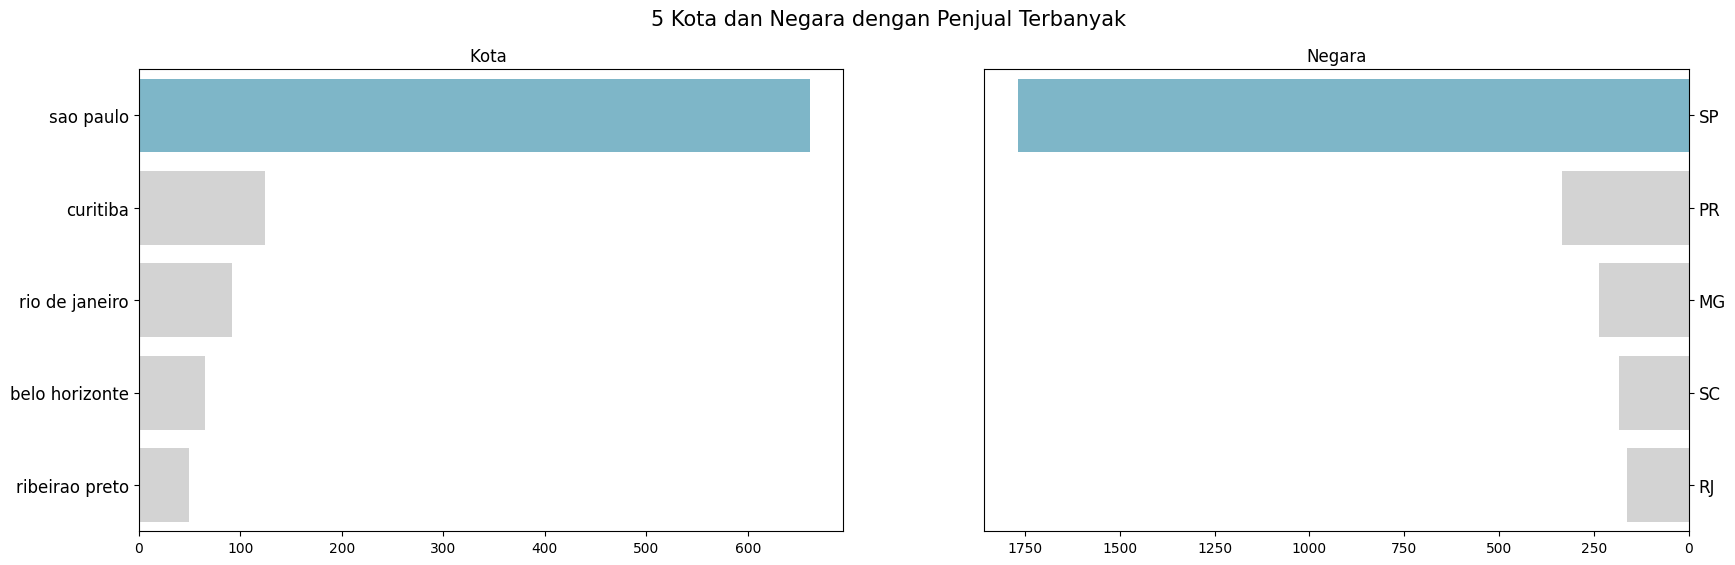

In [144]:
city_seller = all_ecommerce_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).head(5)
state_seller = all_ecommerce_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=city_seller.values, y=city_seller.index, hue = city_seller.index, dodge=False, legend=False, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kota ",loc="center",fontsize=12)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x=state_seller.values, y=state_seller.index, hue = state_seller.index, dodge=False, legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara", loc="center", fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("5 Kota dan Negara dengan Penjual Terbanyak", fontsize=15)
plt.show()

In [145]:
print(city_seller)
print(state_seller)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
Name: seller_id, dtype: int64
seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
Name: seller_id, dtype: int64


In [146]:
all_ecommerce_df.to_csv("data_ecommerce.csv",index=False)

## Conclusion

- Bagaimana performa waktu pengiriman pesanan yang terkirim oleh E-Commerce Olist dari proses pembelian hingga pesanan sampai?


> E-Commerce Olist menunjukkan performa yang baik dalam mengirimkan pesanan kepada pelanggan, dapat diliat melalui rata-rata waktu pengiriman sebenarnya yaitu 12 hari yang lebih singkat dibandingkan dengan rata-rata estimasi waktu yang telah ditetapkan yaitu 23 hari.

- Kategori produk apa yang paling banyak dibeli pelanggan?


> Lima kategori produk E-Commerce Olist yang paling banyak dibeli pelanggan secara berurutan adalah bed bath table sebanyak 14603, furniture decor sebanyak 11932, health beauty sebanyak 11247, sports leisure sebanyak 10111, dan computer accessories sebanyak 10044 produk terjual.


- Tipe pembayaran apa yang paling banyak digunakan pelanggan?


> Berdasarkan diagram lingkaran yang ditampilkan, tipe pembayaran yang paling banyak digunakan pelanggan berturut-turut adalah credit card dengan persentase sebesar 75.3%, boleto sebesar 19.5%, voucher sebesar 3,7%, dan debit card sebesar 1.5%.


- Bagaimana tingkat kepuasan pelanggan berdasarkan review yang diberikan?


> Tingkat kepuasan pelanggan, yang diukur berdasarkan review yang diberikan, menunjukkan bahwa sebagian besar pelanggan memberikan review dengan skor 5 sebanyak 66046 pelanggan, diikuti oleh skor 4 sebanyak 22150, skor 1 sebanyak 13118, skor 3 sebanyak 9649, dan skor 2 sebanyak 3899.


- Dimana lokasi dengan pelanggan terbanyak?


> Lima kota dengan pelanggan terbanyak adalah sao paulo sebanyak 15045 pelanggan, rio janeiro sebanyak 6601, belo horizonte sebanyak 2697, brasilia sebanyak 2071, dan curitiba sebanyak 1489.

> Sedangkan lima negara dengan pelanggan terbanyak antara lain SP sebanyak 40501 pelanggan, RJ sebanyak 12350 , MG sebanyak 11354, RS sebanyak 5345, dan PR sebanyak 4923.


- Dimana lokasi dengan penjual terbanyak?


> Lima kota dengan penjual terbanyak adalah sao paulo sebanyak 661 penjual, curitiba sebanyak 124, rio de janeiro sebanyak 92, belo horizonte sebanyak 65, dan ribeirao preto sebanyak 50.

> Sedangkan lima negara dengan penjual terbanyak antara lain SP sebanyak 1769 penjual, PR sebanyak 335, MG sebanyak 236, SC sebanyak 184, dan RJ sebanyak 163.





